# Linear Regression

Linear Regression is a statistical technique that model a relationship between two variable. These two variables are independent (explanotary) and depended-variable. Independent variables(response) can't be controlled, they need to be estimated or predicted. The depended variable is controllable as it is input value.

**The goal in regression problems is to predict the value of a continuous independed variable**

**Example:** Suppose you wish to know the price of a pizza. But we have machine learning book, so we will use simple linear regression to predict the price of a pizza based on an attribute of the pizza that we can observe. Let's model the relationship between the size of a pizza and its price.


|Diameter (inc)|Price ($)|
|---|---|
|6|7|
|8|9|
|10|13|
|14|17.5|
|18|18|

* We can visualize our training data by plotting it on a graph using matplotlib


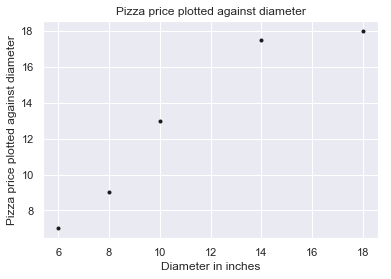

In [56]:
#import the matplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
#define the data #reshape for one varibale
X = np.array([6,8,10,14,18]).reshape(-1,1)
y = np.array([7,9,13,17.5,18]).reshape(-1,1)

plt.xlabel('Diameter in inches')
plt.ylabel('Pizza price plotted against diameter')
plt.title('Pizza price plotted against diameter')
plt.plot(X,y,'k.')
plt.show()

In [57]:
#Let'r create our model
from sklearn.linear_model import  LinearRegression
model = LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print(model.predict(X))

[[ 7.82327586]
 [ 9.77586207]
 [11.72844828]
 [15.63362069]
 [19.5387931 ]]


In [70]:
print(model.coef_)

[[0.9762931]]


In [67]:
print(model.score(X,y))

0.9100015964240102


In [79]:
def find_inc(x):
    """Find the price for a given diameter value"""
    #y = mx + b
    find_y = model.coef_ * x + model.intercept_
    return np.round(find_y,2)

In [80]:
print(find_inc(12))

[[13.68]]


The fit method of LinearRegression learns the parameters of the following model for simple linear regression:
$y =\beta x +  \alpha  $ y is the predicted value of the response variable(or independed variable); in this example, it is the predicted price of the pizza. x is the explanatory variable(depended-variable). The intercept  $\alpha$ term  and $\beta$ coefficient are parameters of the model that are learned by the learning algorithm.

We need to find out that our model quality. For this, we use the loss function also called cost function.  This function is the calculated sum of the squared residuals. Residuals are defined with the differences between the predicted values by the observed values in the training data set. 

* In statistics, this function called in different ways 
    * Residual sum of squares(RSS)
    * Sum of squared residual (SSR)
    * Sum of squared estimated of error(SSE)
    
    
$$RSS = \sum_{i=1}^{n}({y_i - f(x_i)})^2 $$



In [84]:
RSS = np.mean((model.predict(X) - y) ** 2)
print(RSS)

1.7495689655172406


* Now that we have a cost function, we can find the values of our model's parameters that minimize it. $\beta$ and $\alpha$ minimize the cost function. We will solve $\bate$ first. To do so, we will calculate the *variance* of x and *covariance* of x and y.


* *Variance* is a measure of how far a set of values is spread out. Variance can be calculated using the following equation: 

$$var(x) = \frac{\sum_{i=1}^{n}(x_i - \bar{x} )^2 }{n-1}$$

* $\bar{x}$ is the mean of the x
* $x_i$ is the value of x for the $i^th$ training instance
* n is the number of training instances

In [106]:
#Let's calculate the variance ofor
x = [[6,8,10,14,18]]
x_mean = np.mean(x)
variance = np.sum([(i - x_mean)**2 for i in x])/4
print(variance)
#there is also numpy methot the calculate the variance
#The ddof keyword parameter can be used to set Bessel's correction to calculate the sample variance:
print(np.var(x, ddof=1))

23.2
23.2


* **Covariance** is a measure of how much two variables change together. If the value of
the variables increase together, their covariance is positive. If one variable tends to
increase while the other decreases, their covariance is negative. If there is no linear
relationship between the two variables, their covariance will be equal to zero; the
variables are linearly uncorrelated but not necessarily independent. Covariance can
be calculated using the following formula:

$$cov(x,y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{n-1} $$

In [111]:
y_cov =[[7,9,13,17.5,18]]
y_mean = np.mean(y_cov)

cov = np.sum([[(i - x_mean)*(j- y_mean) for i in x] for j in y_cov])/4
print(cov)

#there is numpy method for covariance

print(np.cov(x,y_cov)[0][1])


22.65
22.650000000000002


Now that we have calculated the variance of our explanatory variable and the covariance of the response and explanatory variables, we can solve $\beta$ using the following formula:

$$\beta = \frac{cov(x,y)}{var(x)}$$

In [114]:
#Let's calculate the beta
beta = cov / variance
print(beta)

0.9762931034482758


* We can solve $\alpha$ using the following formula: 
$$\alpha = \bar{y} -\beta \bar{x} $$

In [115]:
alpha = y_mean - beta * x_mean
print(alpha)

1.9655172413793114


In [116]:
def price_expect(x):
    result = beta * x + alpha
    return round(result, 2)

In [117]:
print(price_expect(11))

12.7


In [118]:
print(price_expect(12))

13.68
